# Problem 11.1
- Find the sequence of positions $x_1, x_2, . . . , x_T$ that maximizes
$$
u(x_1, x_2, . . . , x_T) = \sum_{t=1}^{T}{ \big{[}x_T \alpha_t - \frac{\kappa}{2}\sigma^2 x_t^2 - c(x_{t} − x_{t−1}) \big{]} }
$$
with risk-aversion $\kappa = 10^{-7}$
. Set tolerance so that your algorithm does not
terminate unless each $x_t \in \mathbb{R}$ is within a distance of one dollar to the true
optimal path. Plot the optimal path $x^* := (x_0=0,x_1^*, . . . , x_T^*)$ and also
report its values in a table. Also report the computation time.
Submit your code and a clear explanation of the algorithm you used,
why your chose it over other possible algorithms, and how you know that
it converges. For example, if you used a method that requires convexity,
explain why the function you are optimizing is convex.

# Solution 1
- Optimal path and its values in a table are shown below.
- The computation time is about 0.10s.
- I use Nelder-Mead method for scipy.optimize.mininize function. I chose it because in our case, the minimum point may not be differentiable, so Newton ans quasi-Newton method are not feasible.
- We can see the negative utility function I am optimizing is convex.
- We know it converges since the function we are optimizing is convex, so the local minimum is global minimum.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import time

In [2]:
def alpha(t, half_life, intial_strength):
    '''
    Alpha_t that represent the forecast about the return of single asset
    '''
    return intial_strength*1e-4*np.power(2,-t/half_life)

In [3]:
def trading_cost(delta, P, V, theta, sigma, gamma, eta, beta):
    '''
    Trading cost for changing position for x_{t-1} to x{t}
    '''
    X = delta/P
    return P*X*(gamma*sigma/2*X/V*np.power(theta/V, 1/4) + np.sign(X)*eta*sigma*np.power(np.abs(X/V),beta))

In [4]:
def negative_utility(x_t, x_t_1, t, half_life=5.0, intial_strength=50, kappa=1e-7, P=40, V=2e6, theta=2e8, sigma=0.02, gamma=0.314, eta=0.142, beta=0.6):
    '''
    Utility for multi-period single asset optimization problem at time t
    '''
    return -(alpha(t, half_life, intial_strength)*x_t - kappa/2*sigma**2*x_t**2
             - trading_cost(x_t-x_t_1, P, V, theta, sigma, gamma, eta, beta))

C:\Users\Carter\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


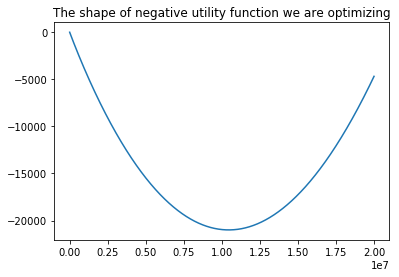

In [5]:
P, V, theta, sigma, gamma, eta, beta = 40, 2e6, 2e8, 0.02, 0.314, 0.142, 0.6
T = 30
t = range(T+1)
x = 1e-5 * np.ones(T+1)
x_exp = np.linspace(0,2e7,1e6)
plt.plot(x_exp,[negative_utility(x, 0, 1) for x in x_exp])
plt.title("The shape of negative utility function we are optimizing")
plt.show()

In [6]:
def coordinate_descent(x_t, half_life=5.0, intial_strength=50, kappa=1e-7, P=40, V=2e6, theta=2e8, sigma=0.02, gamma=0.314, eta=0.142, beta=0.6):
    '''
    Since the trading cost (Almgren and Chris Model) is non-differentiable, we use coordinate descent to get the global minimum point
    '''
    x_t[0] = 0
    for i in range(1, len(x_t)):
        intial = alpha(i, half_life, intial_strength)/(kappa*sigma**2)
        x_t[i] =  optimize.minimize(negative_utility, intial, args=(x_t[i-1], i,half_life, intial_strength, kappa, P, V, theta, sigma, gamma, eta, beta),
                                    method= "Nelder-Mead", tol=1).x
    return x_t        

In [7]:
start = time.time()
x_path = coordinate_descent(x)
comp_time = time.time() - start
print("Computation time is ",comp_time, " seconds.")

Computation time is  0.1165468692779541  seconds.


In [8]:
x_without_cost = [alpha(t, 5, 50)/(1e-7*0.02**2) for t in range(31)]
x_without_cost[0] = 0

In [9]:
table = pd.DataFrame(x_path, columns={'Optimal path'})
table1 = pd.DataFrame(x_without_cost, columns={"Markowitz portfolio"})
table_together  = pd.concat([table, table1], axis=1)
table_together

,Optimal path,Markowitz portfolio
0,0.000000e+00,0.000000e+00
1,1.045223e+07,1.088188e+08
2,1.824888e+07,9.473229e+07
3,2.393468e+07,8.246924e+07
4,2.795552e+07,7.179365e+07
5,3.067620e+07,6.250000e+07
6,3.239557e+07,5.440941e+07
7,3.336021e+07,4.736614e+07
8,3.377869e+07,4.123462e+07
9,3.384646e+07,3.589682e+07


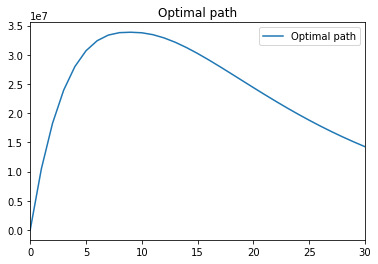

In [10]:
table.plot()
plt.title("Optimal path")
plt.legend()
plt.show()

- Use the program you wrote in part (a) to plot expected profit of the optimal
path, $\mathbb{E}[\pi(x^*)]$ and ex ante Sharpe ratio of the optimal path, defined as
$$\text{Sharpe}(x^∗) = \sqrt{252} \frac{\mathbb{E}[\pi(x^∗)]}{\sqrt{\mathbb{V}[\pi(x^*)]}}$$
as a function of $\kappa$, as a function of the half-life (which was taken to be
5 in equation (11.9) above), as a function of the initial strength (taken
to be 50 in equation (11.9)), and as a function of σ. So you need to do
eight plots in all: profit and Sharpe ratio, each as a function of one of
four parameters (holding the others fixed). Choose appropriate intervals
around the parameter values in part (a). Note that $\kappa$ cannot be negative
in reasonable models.

# Solution 2

In [11]:
def profit(x_t, kappa=1e-7, half_life=5, initial_strength=50, P=40, V=2e6, theta=2e8, sigma=0.02, gamma=0.314, eta=0.142, beta=0.6):
    t = range(len(x_t))
    alpha_t = [alpha(i, half_life, initial_strength) for i in t]
    return np.dot(x_t.T,alpha_t) - np.sum([trading_cost(d, P, V, theta, sigma, gamma, eta, beta) for d in np.diff(x_t)])

def sharpe_ratio(x_t, kappa=1e-7, half_life=5, initial_strength=50, P=40, V=2e6, theta=2e8, sigma=0.02, gamma=0.314, eta=0.142, beta=0.6):
    E_pi = profit(x_t, kappa, half_life, initial_strength, P, V, theta, sigma, gamma, eta, beta)
    V_pi = np.linalg.norm(x_t)*sigma
    return np.sqrt(252)*E_pi/V_pi

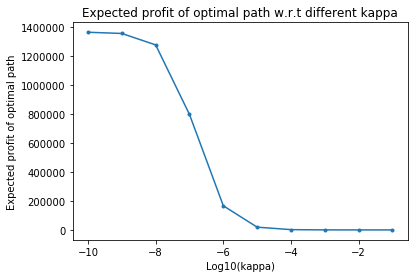

In [12]:
E_pi = []
kappa_interval = [10**(-k) for k in range(1,11)]
for kappa in kappa_interval:
    x_t = coordinate_descent(x, 5, 50, kappa, P, V, theta, sigma, gamma, eta, beta)
    E_pi.append(profit(x_t, kappa))
plt.plot(np.log10(kappa_interval), E_pi, '.-')
plt.title("Expected profit of optimal path w.r.t different kappa")
plt.xlabel("Log10(kappa)")
plt.ylabel("Expected profit of optimal path")
plt.show()

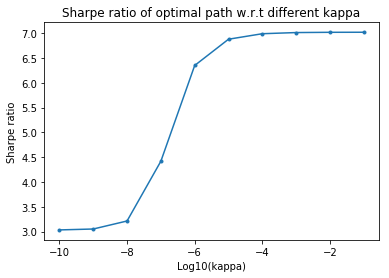

In [13]:
Shape_ratio = []
kappa_interval = [10**(-k) for k in range(1,11)]
for kappa in kappa_interval:
    x_t = coordinate_descent(x, 5, 50, kappa, P, V, theta, sigma, gamma, eta, beta)
    Shape_ratio.append(sharpe_ratio(x_t, kappa))
plt.plot(np.log10(kappa_interval), Shape_ratio, '.-')
plt.title("Sharpe ratio of optimal path w.r.t different kappa")
plt.xlabel("Log10(kappa)")
plt.ylabel("Sharpe ratio")
plt.show()

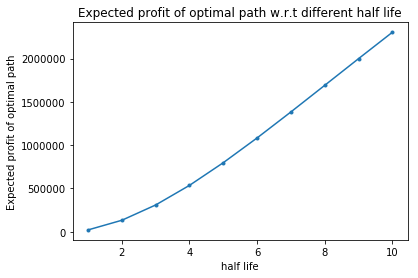

In [14]:
E_pi = []
half_life_interval = range(1,11)
for half_life in half_life_interval:
    x_t = coordinate_descent(x, half_life, 50, 1e-7, P, V, theta, sigma, gamma, eta, beta)
    E_pi.append(profit(x_t,kappa=1e-7, half_life=half_life))
plt.plot(half_life_interval, E_pi, '.-')
plt.title("Expected profit of optimal path w.r.t different half life")
plt.xlabel("half life")
plt.ylabel("Expected profit of optimal path")
plt.show()

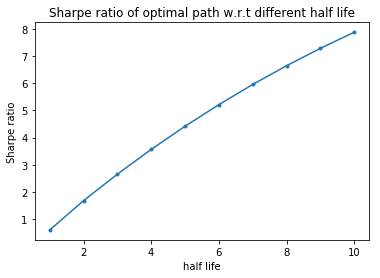

In [15]:
Shape_ratio = []
half_life_interval = range(1,11)
for half_life in half_life_interval:
    x_t = coordinate_descent(x, half_life, 50, 1e-7, P, V, theta, sigma, gamma, eta, beta)
    Shape_ratio.append(sharpe_ratio(x_t, kappa=1e-7, half_life=half_life))
plt.plot(half_life_interval, Shape_ratio, '.-')
plt.title("Sharpe ratio of optimal path w.r.t different half life")
plt.xlabel("half life")
plt.ylabel("Sharpe ratio")
plt.show()

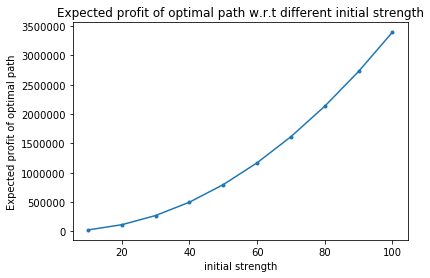

In [16]:
E_pi = []
initial_strength_interval = range(10,110,10)
for initial_strength in initial_strength_interval:
    x_t = coordinate_descent(x, 5, initial_strength, 1e-7, P, V, theta, sigma, gamma, eta, beta)
    E_pi.append(profit(x_t, kappa=1e-7, half_life=5,initial_strength=initial_strength))
plt.plot(initial_strength_interval, E_pi, '.-')
plt.title("Expected profit of optimal path w.r.t different initial strength")
plt.xlabel("initial strength")
plt.ylabel("Expected profit of optimal path")
plt.show()

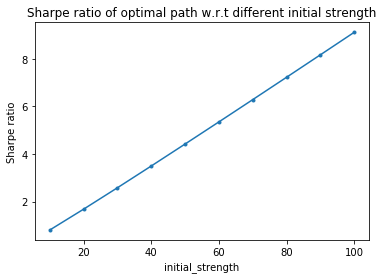

In [17]:
Shape_ratio = []
initial_strength_interval = range(10,110,10)
for initial_strength in initial_strength_interval:
    x_t = coordinate_descent(x, 5, initial_strength, 1e-7, P, V, theta, sigma, gamma, eta, beta)
    Shape_ratio.append(sharpe_ratio(x_t, kappa=1e-7, half_life=5,initial_strength=initial_strength))
plt.plot(initial_strength_interval, Shape_ratio, '.-')
plt.title("Sharpe ratio of optimal path w.r.t different initial strength")
plt.xlabel("initial_strength")
plt.ylabel("Sharpe ratio")
plt.show()

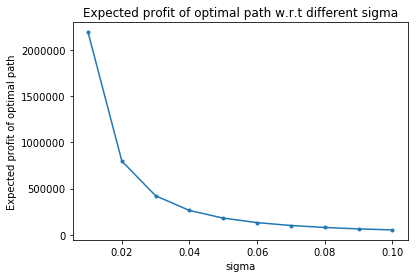

In [18]:
E_pi = []
sigma_interval = [0.01*k for k in range(1,11)]
for sigma in sigma_interval:
    x_t = coordinate_descent(x, 5, 50, 1e-7, P, V, theta, sigma, gamma, eta, beta)
    E_pi.append(profit(x_t, kappa=1e-7, half_life=5, initial_strength=50, P=40, V=2e6, theta=2e8, sigma=sigma, gamma=0.314, eta=0.142, beta=0.6))
plt.plot(sigma_interval, E_pi, '.-')
plt.title("Expected profit of optimal path w.r.t different sigma")
plt.xlabel("sigma")
plt.ylabel("Expected profit of optimal path")
plt.show()

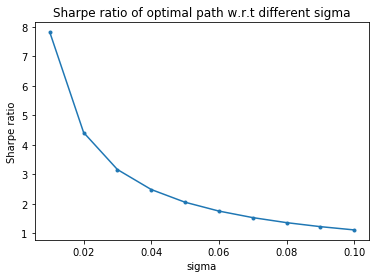

In [19]:
Shape_ratio = []
sigma_interval = [0.01*k for k in range(1,11)]
for sigma in sigma_interval:
    x_t = coordinate_descent(x, 5, 50, 1e-7, P, V, theta, sigma, gamma, eta, beta)
    Shape_ratio.append(sharpe_ratio(x_t, kappa=1e-7, half_life=5, initial_strength=50, P=40, V=2e6, theta=2e8, sigma=sigma, gamma=0.314, eta=0.142, beta=0.6))
plt.plot(sigma_interval, Shape_ratio, '.-')
plt.title("Sharpe ratio of optimal path w.r.t different sigma")
plt.xlabel("sigma")
plt.ylabel("Sharpe ratio")
plt.show()